In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import os
import copy
import random
from tqdm import tqdm
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from dataset_utils import parse_annotation, modify_annotation
from BaselineAugmenterPipeline import augmenter

/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


## Dataset VOC2007
All 20 classes in data:

| Object Class | Object Class | Object Class | Object Class | Object Class |
| ------------ | ------------ | ------------ | ------------ | ------------ |
| Aeroplane    | Bicycle      | Bird         | Boat         | Bottle       |
| Bus          | Car          | Cat          | Chair        | Cow          |
| Dining table | Dog          | Horse        | Motorbike    | Person       |
| Potted plant | Sheep        | Sofa         | Train        | TV/monitor   |


| Object | Mapped To |
| --- | --- |
| cow | sheep, horse |
| sheep | cow, horse |
| horse | cow, sheep |
| bicycle | motorbike |
| motorbike | bicycle |
| cat | dog |
| car | bicycle |
| person | potted plant |
| bird | cat |

In [3]:
object_classes = ["bicycle", "aeroplane", "bird", "boat", "bottle",
                "bus", "car", "cat", "chair", "cow",
                "dining table", "dog", "horse", "motorbike", "person",
                "potted plant", "sheep", "sofa", "train", "tvmonitor"]

In [4]:
dataset_path = './VOC2007'
annotation_path = os.path.join(dataset_path,'Annotations/000120.xml')
image_filename, annotations = parse_annotation(annotation_path)
image_filename = image_filename.rsplit('.', 1)[0]

In [5]:
annotations

{'dog': [(<PIL.Image.Image image mode=L size=500x400>, 0)]}

In [6]:
image_filename

'000120'

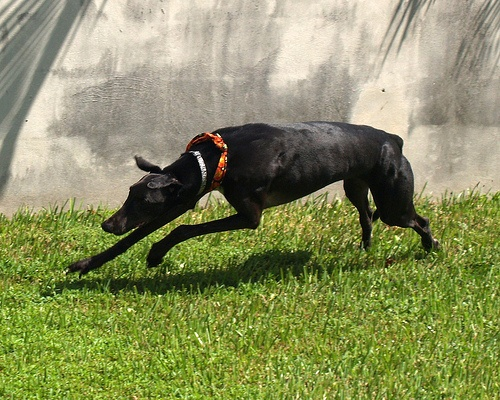

In [7]:
current_object = 'dog'
mask, ind = annotations[current_object][0]
image = Image.open(os.path.join('./VOC2007/JPEGImages', image_filename+'.jpg'))
image

## Creating an augmented dataset

### Pipeline for augmentation

In [8]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

In [9]:
model = augmenter()

Loading checkpoint shards: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 3/3 [00:13<00:00,  4.53s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]An error occurred while trying to fetch /home/jovyan/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/jovyan/.cache/huggingface/hub/models--runwayml--stab

07/06 18:34:51 - mmengine - INFO - Successfully add external embeddings: P_ctxt, P_shape, P_obj.
07/06 18:34:51 - mmengine - INFO - Successfully add trainable external embeddings: P_ctxt, P_shape, P_obj


100%|██████████| 50/50 [00:01<00:00, 33.89it/s]


New object: fox, prompt: The fox has a slender body with soft, reddish-brown fur, a bushy tail, and piercing amber eyes.



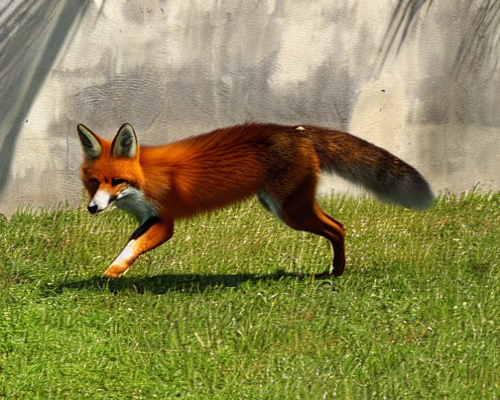

In [41]:
set_seed(5)
new_image, new_object, prompt = model(pil_image=image,
                                    pil_mask=mask,
                                    current_object=current_object,
                                    new_objects_list=['fox'],
                                    num_inference_steps=50,
                                    guidance_scale=7.5,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

### Examples of generation

New object: person, prompt: 'An illustration of a middle-aged woman with brown eyes, short black hair, and fair complexion wearing a blue button-down shirt over dark skinny jeans.'



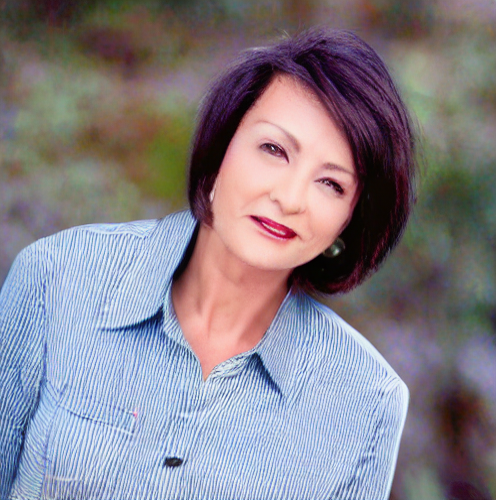

In [87]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: cat, prompt: The sleek, striped feline with its warm brown fur, alert emerald-green eyes, and pointy ears, rests gracefully on its sturdy paws. Cat.



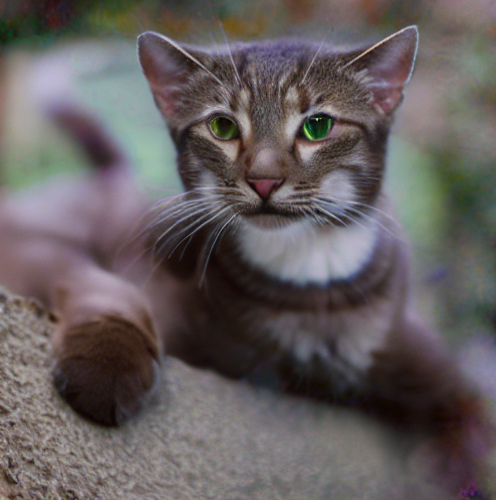

In [58]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: cat, prompt: a small, soft-furred creature with curved ears, a slim body, and long tail ending in rounded tip; a feline friend; cat.



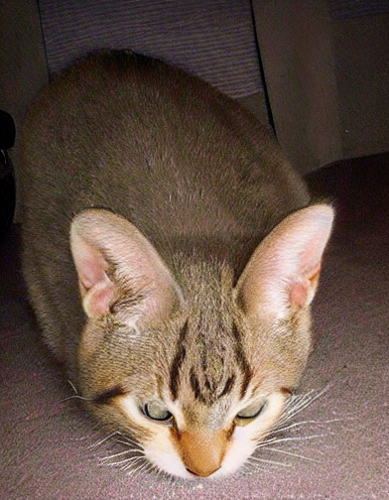

In [54]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: chair, prompt: a sturdy, well-crafted seat with a comfortable backrest and smooth wooden legs forming a solid support system - chair



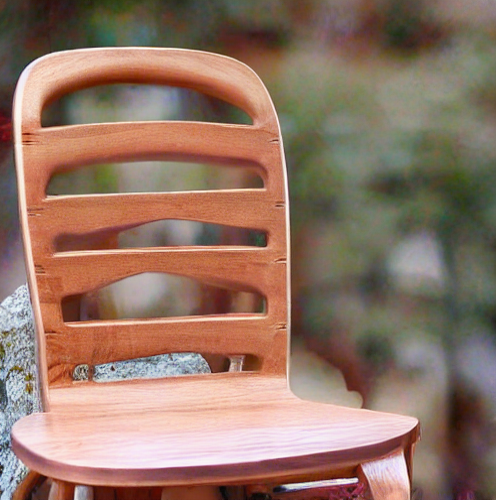

In [172]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: pottedplant, prompt: a lively, green-leaved, compact arrangement in a modest terracotta container



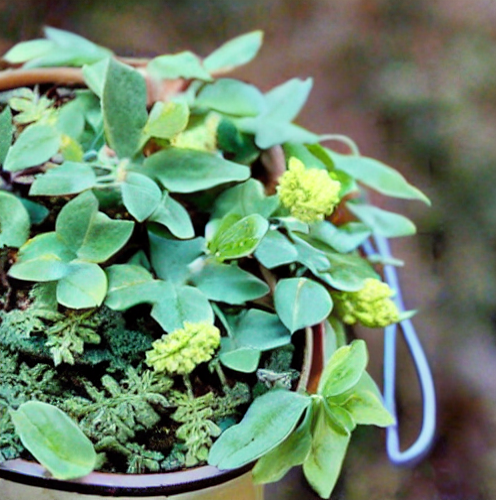

In [169]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: cat, prompt: a cat appears soft, warm-colored with gentle movements, fluffy tail, and alert, inquisitive eyes. Cat.



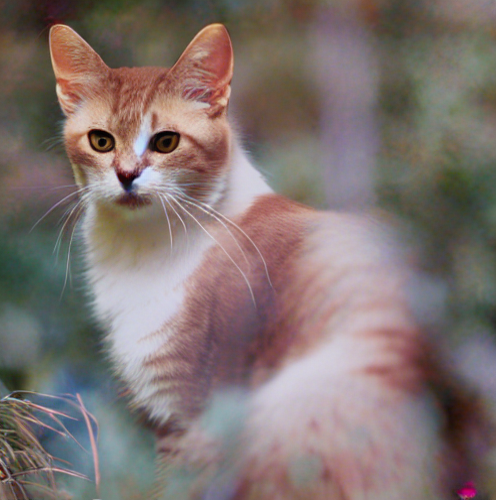

In [144]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: bird, prompt: a small, graceful creature with soft feathers in various colors, featuring long beak and slender legs - bird.



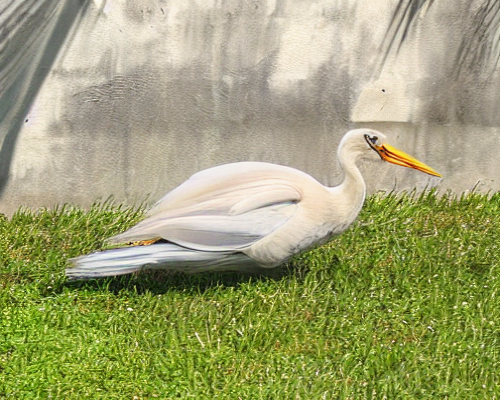

In [85]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: rabbit, prompt: a small fluffy creature with long curved ears and compact body featuring soft, delicate fur. Rabbit.



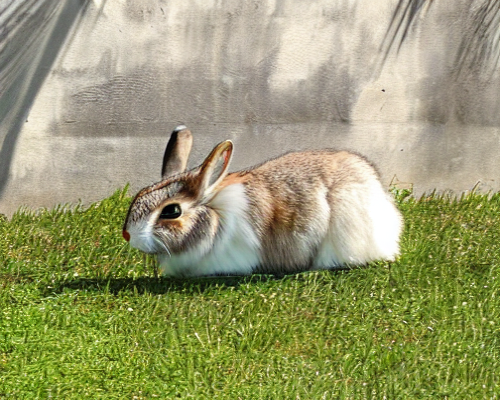

In [46]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

New object: a fox, prompt: a captivating creature with golden fur, piercing eyes, pointy ears, graceful tail, and slender body. Fox



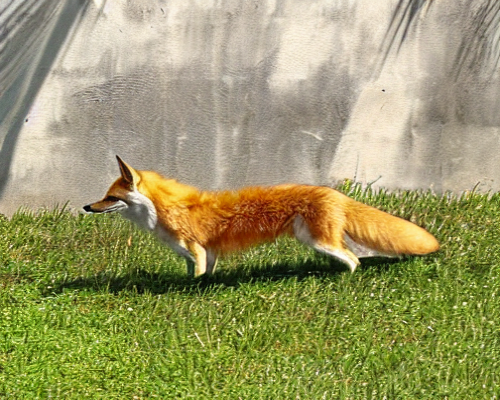

In [28]:
print(f'New object: {new_object}, prompt: {prompt}\n')
new_image

### Augmenting VOC2007 and rewriting annotations
Full augmentation of the training set, about two augmentations per picture

In [10]:
with open('./VOC2007/ImageSets/Main/train.txt', 'r') as file:
    train_numbers = file.read().splitlines()

In [ ]:
set_seed(50)
directory = './VOC2007/Annotations'
new_index = 1

files = sorted(os.listdir('./VOC2007/Annotations'))
files.pop(0)

for filename in files:
    annotation_path = os.path.join(directory, filename)
    image_filename, annotations = parse_annotation(annotation_path)
    image_filename = image_filename.rsplit('.', 1)[0]
    if image_filename not in train_numbers:
        continue
                
    #Create 2 different augmentations if there are a sufficient number of objects 
    for _ in range(2): 
        if not sum(map(len, annotations.values())):
            break
        current_object = random.choice(list(annotations.keys())) 
        annotation = random.choice(annotations[current_object])  
        annotations[current_object].remove(annotation) 
        if not annotations[current_object]:
            del annotations[current_object]

        mask, replaced_object_index = annotation
        image = Image.open(os.path.join('./VOC2007/JPEGImages', image_filename+'.jpg'))
        try:
            new_image, new_object, prompt = model(pil_image=image,
                                                pil_mask=mask,
                                                current_object=current_object,
                                                new_objects_list=object_classes,
                                                num_inference_steps=50,
                                                guidance_scale=7.5,
                                                return_prompt=True)
        except Exception as e:
            print(f"An error occurred: {e}. Moving on to the next iteration.")
            continue
        if new_object not in object_classes:
            continue
            
        # Saving new annotation        
        new_annotation_filename = '{:06d}'.format(new_index)                                                        
                                                    
        modify_annotation(old_annotation_filename=image_filename, 
                          new_annotation_filename=new_annotation_filename, 
                          new_object_class=new_object, 
                          replaced_object_index=replaced_object_index,
                          name_of_augmentation_set_dir='VOC2007_augmentation_v3')
        # Saving prompt
        prompt_path = os.path.join('./VOC2007_augmentation_v3/Prompts', new_annotation_filename+'.txt')
        with open(prompt_path, 'w') as f:
            f.write(prompt)

        # Saving new image
        new_image.save(os.path.join('./VOC2007_augmentation_v3/JPEGImages', new_annotation_filename+'.jpg'))
        
        # Saving type of new dataset object
        with open('./VOC2007_augmentation_v3/ImageSets/Main/train.txt', 'a') as output_file:
            output_file.write(new_annotation_filename+'\n')
        new_index+=1

Augmentation of only images with one object

In [23]:
with open('./VOC2007/ImageSets/Main/train.txt', 'r') as file:
    train_numbers = file.read().splitlines()

In [ ]:
set_seed(50)
directory = './VOC2007/Annotations'
new_index = 1

files = sorted(os.listdir('./VOC2007/Annotations'))
files.pop(0)

for filename in files:
    annotation_path = os.path.join(directory, filename)
    image_filename, annotations = parse_annotation(annotation_path)
    image_filename = image_filename.rsplit('.', 1)[0]
    if image_filename not in train_numbers or sum(map(len, annotations.values())) > 1:
        continue
                
    current_object = random.choice(list(annotations.keys())) 
    annotation = random.choice(annotations[current_object])  

    mask, replaced_object_index = annotation
    image = Image.open(os.path.join('./VOC2007/JPEGImages', image_filename+'.jpg'))
    try:
        new_image, new_object, prompt = model(pil_image=image,
                                                pil_mask=mask,
                                                current_object=current_object,
                                                new_objects_list=object_classes,
                                                num_inference_steps=50,
                                                guidance_scale=7.5,
                                                return_prompt=True)
    except Exception as e:
        print(f"An error occurred: {e}. Moving on to the next iteration.")
        continue
    if new_object not in object_classes:
        continue
            
    # Saving new annotation        
    new_annotation_filename = '{:06d}'.format(new_index)                                                        
                                                    
    modify_annotation(old_annotation_filename=image_filename, 
                          new_annotation_filename=new_annotation_filename, 
                          new_object_class=new_object, 
                          replaced_object_index=replaced_object_index,
                          name_of_augmentation_set_dir='VOC2007_augmentation_only1obj')
    # Saving prompt
    prompt_path = os.path.join('./VOC2007_augmentation_only1obj/Prompts', new_annotation_filename+'.txt')
    with open(prompt_path, 'w') as f:
        f.write(prompt)

    # Saving new image
    new_image.save(os.path.join('./VOC2007_augmentation_only1obj/JPEGImages', new_annotation_filename+'.jpg'))
        
    # Saving type of new dataset object
    with open('./VOC2007_augmentation_only1obj/ImageSets/Main/train.txt', 'a') as output_file:
        output_file.write(new_annotation_filename+'\n')
    new_index+=1

We will augment a purely potted plant, and I do not fix the seed, since otherwise the prompta will not be diverse.

In [10]:
with open('./VOC2007/ImageSets/Main/train.txt', 'r') as file:
    train_numbers = file.read().splitlines()

In [11]:
directory = './VOC2007/Annotations'
new_index = 1

files = sorted(os.listdir('./VOC2007/Annotations'))
files.pop(0)

for filename in files:
    annotation_path = os.path.join(directory, filename)
    image_filename, annotations = parse_annotation(annotation_path)
    image_filename = image_filename.rsplit('.', 1)[0]
    if image_filename not in train_numbers or sum(map(len, annotations.values())) > 1:
        continue
                
    current_object = random.choice(list(annotations.keys())) 
    annotation = random.choice(annotations[current_object])  

    mask, replaced_object_index = annotation
    image = Image.open(os.path.join('./VOC2007/JPEGImages', image_filename+'.jpg'))
    try:
        new_image, new_object, prompt = model(pil_image=image,
                                                pil_mask=mask,
                                                current_object=current_object,
                                                new_objects_list=['potted plant'],
                                                num_inference_steps=50,
                                                guidance_scale=7,
                                                return_prompt=True)
    except Exception as e:
        print(f"An error occurred: {e}. Moving on to the next iteration.")
        continue
    if new_object!='pottedplant':
        continue
            
    # Saving new annotation        
    new_annotation_filename = '{:06d}'.format(new_index)                                                        
                                                    
    modify_annotation(old_annotation_filename=image_filename, 
                          new_annotation_filename=new_annotation_filename, 
                          new_object_class=new_object, 
                          replaced_object_index=replaced_object_index,
                          name_of_augmentation_set_dir='VOC2007_augmentation_pottedplant')
    # Saving prompt
    prompt_path = os.path.join('./VOC2007_augmentation_pottedplant/Prompts', new_annotation_filename+'.txt')
    with open(prompt_path, 'w') as f:
        f.write(prompt)

    # Saving new image
    new_image.save(os.path.join('./VOC2007_augmentation_pottedplant/JPEGImages', new_annotation_filename+'.jpg'))
        
    # Saving type of new dataset object
    with open('./VOC2007_augmentation_pottedplant/ImageSets/Main/train.txt', 'a') as output_file:
        output_file.write(new_annotation_filename+'\n')
    new_index+=1

100%|██████████| 50/50 [00:01<00:00, 34.49it/s]
